# 10_monkeys
## 数据采用ImageDataGenerator处理

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os

print(os.listdir("D:/Users/JP/Desktop/新建文件夹/chapter_6/input"))
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time

from tensorflow import keras

['monkey_labels.txt', 'training', 'validation']


In [3]:
train_dir = "D:Users\JP\Desktop\新建文件夹\chapter_6\input/training/training"
valid_dir = "D:Users\JP\Desktop\新建文件夹\chapter_6\input/validation/validation"
label_file = "D:Users\JP\Desktop\新建文件夹\chapter_6\input/monkey_labels.txt"

In [9]:
# head 自动读取第一行  自定义行name['','']但是header=None
labels = pd.read_csv(label_file, header=0)
labels

,1,2,3,4
n0,alouatta_palliata\t,mantled_howler,131,26
n1,erythrocebus_patas\t,patas_monkey,139,28
n2,cacajao_calvus\t,bald_uakari,137,27
n3,macaca_fuscata\t,japanese_macaque,152,30
n4,cebuella_pygmea\t,pygmy_marmoset,131,26
n5,cebus_capucinus\t,white_headed_capuchin,141,28
n6,mico_argentatus\t,silvery_marmoset,132,26
n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
n9,trachypithecus_johnii,nilgiri_langur,132,26


In [10]:
height = 128
width = 128
channels = 3
batch_size = 64
num_classes = 10
# 图片处理方式
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,  # 对图片像素点值进行缩放0-1   rgb(0，255)
    rotation_range=40,  # 旋转角度
    width_shift_range=0.2,  # 水平位移
    height_shift_range=0.2,  # 垂直位移
    shear_range=0.2,  # 剪切
    zoom_range=0.2,  # 缩放
    horizontal_flip=True,  # 水平翻转
    fill_mode='nearest'  # 放大填充方式
)

# 图片读取
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),  # 图片大小
    batch_size=batch_size,  # 一组图片数量
    seed=7,
    shuffle=True,
    class_mode='categorical'  # 返回标签格式 2d one-hot
)

valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(height, width),
    batch_size=batch_size,
    seed=7,
    shuffle=True,
    class_mode='categorical'
)

train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num, valid_num)


Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098 272


In [11]:
# generator return image-tensor  image-labels
for i in range(2):
    x, y = train_generator.next()
    print(x)
    print('-' * 20)
    # 标签设置了独热码格式
    print(y)

[[[[0.44338378 0.6450197  0.5951821 ]
   [0.44479486 0.64831215 0.59753394]
   [0.4462059  0.65160465 0.5998857 ]
   ...
   [0.19519584 0.24633545 0.23200944]
   [0.1989587  0.25150937 0.2376537 ]
   [0.20272152 0.25668326 0.24329798]]

  [[0.45944428 0.66803503 0.61842304]
   [0.46320713 0.67038685 0.62312657]
   [0.46697    0.6727386  0.6278301 ]
   ...
   [0.21980183 0.27348092 0.26686063]
   [0.22168325 0.27301058 0.26874208]
   [0.22356467 0.2725402  0.2706235 ]]

  [[0.48307958 0.6801732  0.64415246]
   [0.48354992 0.6787621  0.64227104]
   [0.48402026 0.67735106 0.64038956]
   ...
   [0.23416258 0.27337828 0.2791289 ]
   [0.236044   0.2752597  0.27959925]
   [0.23792544 0.27714112 0.28006962]]

  ...

  [[0.1254902  0.22352943 0.14117648]
   [0.1254902  0.22352943 0.14117648]
   [0.1254902  0.22352943 0.14117648]
   ...
   [0.09800694 0.13715805 0.14107962]
   [0.08558797 0.10161752 0.10622563]
   [0.07910716 0.10074235 0.11183127]]

  [[0.1254902  0.22352943 0.14117648]
   [0.1

In [12]:
model = keras.models.Sequential([
    #第一组卷积
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                        activation='relu', input_shape=[width, height, channels]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    #第二组翻倍
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    #第三组再翻倍
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    #展平后，和全连接层做连接
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax'),
])

# 标签独热码，loss采用cate..
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [13]:
epochs = 300
#如果机器性能好，可以把epochs改为300
with tf.device('/GPU:0'):
    history = model.fit_generator(train_generator,
                                  #显试指定
                                  steps_per_epoch=train_num // batch_size,  # 多少数据算一轮
                                  epochs=epochs,
                                  validation_data=valid_generator,
                                  validation_steps=valid_num // batch_size,  # 验证集返回次数
                                  verbose=1)

C:\Users\JP\AppData\Local\Temp\ipykernel_3312\3558794464.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/300
17/17 [==============================] - 17s 670ms/step - loss: 2.3033 - accuracy: 0.1035 - val_loss: 2.2712 - val_accuracy: 0.1484
Epoch 2/300
17/17 [==============================] - 11s 611ms/step - loss: 2.1574 - accuracy: 0.1939 - val_loss: 2.0118 - val_accuracy: 0.2773
Epoch 3/300
17/17 [==============================] - 10s 601ms/step - loss: 2.0086 - accuracy: 0.2369 - val_loss: 1.7900 - val_accuracy: 0.3867
Epoch 4/300
17/17 [==============================] - 10s 583ms/step - loss: 1.8248 - accuracy: 0.3211 - val_loss: 1.6716 - val_accuracy: 0.3984
Epoch 5/300
17/17 [==============================] - 10s 594ms/step - loss: 1.7305 - accuracy: 0.3743 - val_loss: 1.6414 - val_accuracy: 0.4219
Epoch 6/300
17/17 [==============================] - 10s 583ms/step - loss: 1.6713 - accuracy: 0.3975 - val_loss: 1.6548 - val_accuracy: 0.4102
Epoch 7/300
17/17 [==============================] - 10s 588ms/step - loss: 1.5749 - accuracy: 0.4168 - val_loss: 1.3802 - val_accuracy:

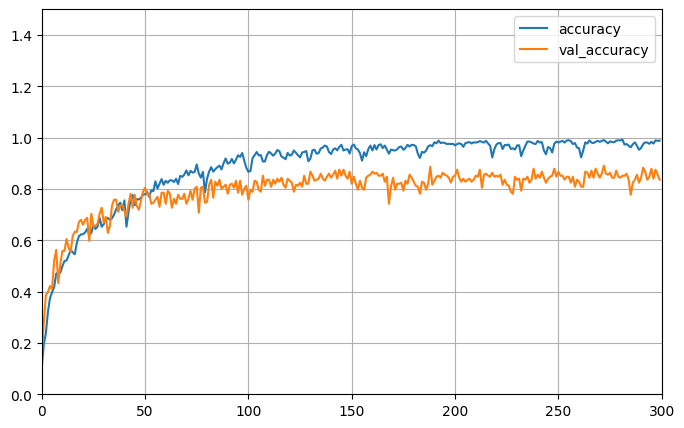

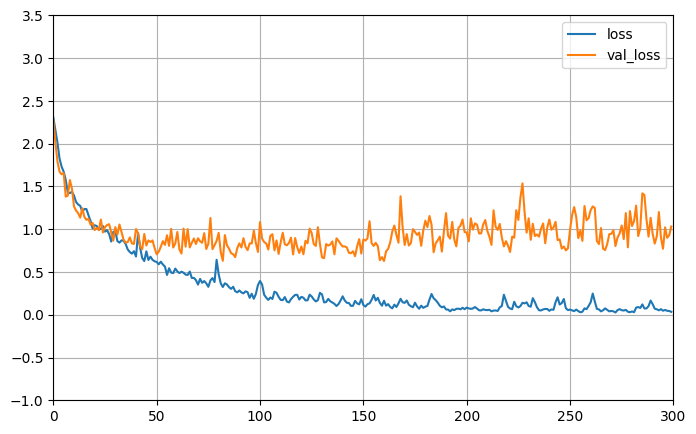

In [17]:
def plot_learning_curves(history, label, epcohs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_' + label] = history.history['val_' + label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()


#因为accuracy的值和loss值的范围很不一样，因此我们打印两条曲线
plot_learning_curves(history, 'accuracy', epochs, 0, 1.5)
plot_learning_curves(history, 'loss', epochs, -1, 3.5)